In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import inaugural, stopwords
from collections import Counter

In [2]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [28]:
obama = inaugural.raw('2009-Obama.txt')
wbush2 = inaugural.raw('2005-Bush.txt')
wbush1 = inaugural.raw('2001-Bush.txt')
clinton2 = inaugural.raw('1997-Clinton.txt')
clinton1 = inaugural.raw('1993-Clinton.txt')
hwbush = inaugural.raw('1989-Bush.txt')
reagan2 = inaugural.raw('1985-Reagan.txt')
reagan1 = inaugural.raw('1981-Reagan.txt')
carter = inaugural.raw('1977-Carter.txt')
nixon2 = inaugural.raw('1973-Nixon.txt')
nixon1 = inaugural.raw('1969-Nixon.txt')
johnson = inaugural.raw('1965-Johnson.txt')
kennedy = inaugural.raw('1961-Kennedy.txt')
eisenhower2 = inaugural.raw('1957-Eisenhower.txt')
eisenhower1 = inaugural.raw('1953-Eisenhower.txt')
truman = inaugural.raw('1949-Truman.txt')
roosevelt4 = inaugural.raw('1945-Roosevelt.txt')
roosevelt3 = inaugural.raw('1941-Roosevelt.txt')
roosevelt2 = inaugural.raw('1937-Roosevelt.txt')
roosevelt1 = inaugural.raw('1933-Roosevelt.txt')
hoover = inaugural.raw('1929-Hoover.txt')
coolidge = inaugural.raw('1925-Coolidge.txt')

In [29]:
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
    return text

obama = text_cleaner(obama)
wbush2 = text_cleaner(wbush2) 
wbush1 = text_cleaner(wbush1)
clinton2 = text_cleaner(clinton2)
clinton1 = text_cleaner(clinton1)
hwbush = text_cleaner(hwbush)
reagan2 = text_cleaner(reagan2)
reagan1 = text_cleaner(reagan1)
carter = text_cleaner(carter)
nixon2 = text_cleaner(nixon2)
nixon1 = text_cleaner(nixon1)
johnson = text_cleaner(johnson)
kennedy = text_cleaner(kennedy)
eisenhower2 = text_cleaner(eisenhower2)
eisenhower1 = text_cleaner(eisenhower1)
truman = text_cleaner(truman)
roosevelt4 = text_cleaner(roosevelt4)
roosevelt3 = text_cleaner(roosevelt3)
roosevelt2 = text_cleaner(roosevelt2)
roosevelt1 = text_cleaner(roosevelt1)
hoover = text_cleaner(hoover)
coolidge = text_cleaner(coolidge)

In [30]:
nlp = spacy.load('en')
obama = nlp(obama)
wbush2 = nlp(wbush2) 
wbush1 = nlp(wbush1)
clinton2 = nlp(clinton2)
clinton1 = nlp(clinton1)
hwbush = nlp(hwbush)
reagan2 = nlp(reagan2)
reagan1 = nlp(reagan1)
carter = nlp(carter)
nixon2 = nlp(nixon2)
nixon1 = nlp(nixon1)
johnson = nlp(johnson)
kennedy = nlp(kennedy)
eisenhower2 = nlp(eisenhower2)
eisenhower1 = nlp(eisenhower1)
truman = nlp(truman)
roosevelt4 = nlp(roosevelt4)
roosevelt3 = nlp(roosevelt3)
roosevelt2 = nlp(roosevelt2)
roosevelt1 = nlp(roosevelt1)
hoover = nlp(hoover)
coolidge = nlp(coolidge)

In [34]:
obama_sents = [[sent, "Obama"] for sent in obama.sents]
wbush2_sents = [[sent, "WBush"] for sent in wbush2.sents]
wbush1_sents = [[sent, "Wbush"] for sent in wbush1.sents]
clinton2_sents = [[sent, "Clinton"] for sent in clinton2.sents]
clinton1_sents = [[sent, "Clinton"] for sent in clinton1.sents]
hwbush_sents = [[sent, "HWBush"] for sent in hwbush.sents]
reagan2_sents = [[sent, "Reagan"] for sent in reagan2.sents]
reagan1_sents = [[sent, "Reagan"] for sent in reagan1.sents]
carter_sents = [[sent, "Carter"] for sent in carter.sents]
nixon2_sents = [[sent, "Nixon"] for sent in nixon2.sents]
nixon1_sents = [[sent, "Nixon"] for sent in nixon1.sents]
johnson_sents = [[sent, "Johnson"] for sent in johnson.sents]
kennedy_sents = [[sent, "Kennedy"] for sent in kennedy.sents]
eisenhower1_sents = [[sent, "Eisenhower"] for sent in eisenhower1.sents]
eisenhower2_sents = [[sent, "Eisenhower"] for sent in eisenhower2.sents]
truman_sents = [[sent, "Truman"] for sent in truman.sents]
roosevelt4_sents = [[sent, "Roosevelt"] for sent in roosevelt4.sents]
roosevelt3_sents = [[sent, "Roosevelt"] for sent in roosevelt3.sents]
roosevelt2_sents = [[sent, "Roosevelt"] for sent in roosevelt2.sents]
roosevelt1_sents = [[sent, "Roosevelt"] for sent in roosevelt1.sents]
hoover_sents = [[sent, "Hoover"] for sent in hoover.sents]
coolidge_sents = [[sent, "Coolidge"] for sent in coolidge.sents]

sentences = pd.DataFrame(obama_sents + wbush2_sents + wbush1_sents + clinton2_sents + clinton1_sents + hwbush_sents
                        + reagan2_sents + reagan1_sents + carter_sents + nixon2_sents + nixon1_sents + johnson_sents
                        + kennedy_sents + eisenhower1_sents + eisenhower2_sents + truman_sents + roosevelt4_sents + 
                         roosevelt3_sents + roosevelt2_sents + roosevelt1_sents+hoover_sents+coolidge_sents)
sentences.tail()

,0,1
2268,"(America, seeks, no, earthly, empire, built, o...",Coolidge
2269,"(No, ambition, ,, no, temptation, ,, lures, he...",Coolidge
2270,"(The, legions, which, she, sends, forth, are, ...",Coolidge
2271,"(The, higher, state, to, which, she, seeks, th...",Coolidge
2272,"(She, cherishes, no, purpose, save, to, merit,...",Coolidge


In [35]:
sentences['party'] = np.where(sentences[1].str.contains('Roosevelt|Truman|Kennedy|Johnson|Carter|Clinton|Obama'), 'D', 'R')

In [36]:
republican_doc = ' '.join(sentences[0].loc[sentences.party == 'R'].astype(str))
democrat_doc = ' '.join(sentences[0].loc[sentences.party == 'D'].astype(str))

republican_doc = nlp(republican_doc)
democrat_doc = nlp(democrat_doc)

In [37]:
# Utility function to create a list of the 2000 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(100)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df['party'] = sentences['party']
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df


# set up the bags
republican_words = bag_of_words(republican_doc)
democrat_words = bag_of_words(democrat_doc) 

# Combine bags to create a set of unique words.
common_words = set(republican_words+democrat_words)

In [38]:
# Create our data frame with features. This can take a while to run.
word_counts = bow_features(sentences, common_words)
word_counts.head()

Processing row 0
Processing row 500
Processing row 1000
Processing row 1500
Processing row 2000


,change,effort,measure,way,support,spirit,face,task,come,meet,...,war,dream,national,party,common,generation,high,lead,text_sentence,text_source
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,"(My, fellow, citizens, :, I, stand, here, toda...",Obama
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(I, thank, President, Bush, for, his, service,...",Obama
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Forty, -, four, Americans, have, now, taken, ...",Obama
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(The, words, have, been, spoken, during, risin...",Obama
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Yet, ,, every, so, often, the, oath, is, take...",Obama


In [40]:
# How many of each type of word is there?
word_counts['cnt_verbs'] = [sum([1 for x in j if x.pos_ == 'VERB']) for j in word_counts.text_sentence]
word_counts['cnt_adj'] = [sum([1 for x in j if x.pos_ == 'ADJ']) for j in word_counts.text_sentence]
word_counts['cnt_prop'] = [sum([1 for x in j if x.pos_ == 'PROPN']) for j in word_counts.text_sentence]
word_counts['cnt_punct'] = [sum([1 for x in j if x.pos_ == 'PUNCT']) for j in word_counts.text_sentence]
word_counts['cnt_adv'] = [sum([1 for x in j if x.pos_ == 'ADV']) for j in word_counts.text_sentence]
word_counts['cnt_nouns'] = [sum([1 for x in j if x.pos_ == 'NOUN']) for j in word_counts.text_sentence]
word_counts['crude_sentiment'] = [j.sentiment for j in word_counts.text_sentence]

In [41]:
word_counts['str_sentence'] = [i.text for i in word_counts.text_sentence]
word_counts['sent_len'] = [len(i) for i in word_counts['str_sentence']]

In [42]:
word_counts.shape

(2273, 138)

### Models

In [49]:
word_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Columns: 138 entries, change to sent_len
dtypes: float64(1), int64(7), object(130)
memory usage: 2.4+ MB


In [55]:
word_counts['party_bin'] = np.where(word_counts['text_source'].str.contains('Roosevelt|Truman|Kennedy|Johnson|Carter|Clinton|Obama'), 0, 1)

In [60]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_val_score

rfc = ensemble.RandomForestClassifier()
Y = word_counts['party_bin']
X = np.array(word_counts.drop(['text_sentence','text_source', 'str_sentence', 'party', 'party_bin'], 1))

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.4,
                                                    random_state=0)

#### Logistic Regression

In [61]:
from sklearn.metrics import roc_auc_score

# How long will it take
from datetime import datetime
start_time = datetime.now()

# get rid of the warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9, max_iter = 150)
lr.fit(x_train, y_train)

# Set Up Predictor
ypred_lr = lr.predict(x_test)

print('Train Percentage accuracy:')
print(lr.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(lr.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(lr, x_train, y_train, cv = 5))

auc = roc_auc_score(y_test, ypred_lr)
print('\nArea Under Curve:')
print('AUC: %.3f' % auc)

from sklearn.metrics import classification_report
print('\nClassification Report:\n')
print(classification_report(y_test, ypred_lr))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

Train Percentage accuracy:
0.6925898752751284

Test Percentage accuracy:
0.6428571428571429

Cross Validation:
[0.61904762 0.57875458 0.61538462 0.60294118 0.63235294]

Area Under Curve:
AUC: 0.601

Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.42      0.47       351
           1       0.68      0.79      0.73       559

   micro avg       0.64      0.64      0.64       910
   macro avg       0.62      0.60      0.60       910
weighted avg       0.63      0.64      0.63       910


Duration: 0:00:00.128044


In [62]:
start_time = datetime.now()

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
# Set Up Predictor
ypred_bnb = bnb.predict(x_test)

print('\nTrain Percentage accuracy:')
print(bnb.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(bnb.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(bnb, x_train, y_train, cv = 5))

print('\nArea Under Curve:')
print('AUC: %.3f' % auc)

print('\nClassification Report:\n')
print(classification_report(y_test, ypred_bnb))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))


Train Percentage accuracy:
0.6815847395451211

Test Percentage accuracy:
0.6131868131868132

Cross Validation:
[0.65567766 0.5970696  0.64468864 0.62132353 0.64338235]

Area Under Curve:
AUC: 0.601

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       351
           1       0.66      0.76      0.71       559

   micro avg       0.61      0.61      0.61       910
   macro avg       0.58      0.57      0.57       910
weighted avg       0.60      0.61      0.60       910


Duration: 0:00:00.095007


In [64]:
start_time = datetime.now()

from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train, y_train)
# Set Up Predictor
ypred_knn = knn.predict(x_test)

print('\nTrain Percentage accuracy:')
print(knn.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(knn.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(knn, x_train, y_train, cv = 5))

print('\nArea Under Curve:')
print('AUC: %.3f' % auc)

print('\nClassification Report:\n')
print(classification_report(y_test, ypred_knn))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))


Train Percentage accuracy:
0.6287600880410859

Test Percentage accuracy:
0.5648351648351648

Cross Validation:
[0.58241758 0.59340659 0.58241758 0.59926471 0.61029412]

Area Under Curve:
AUC: 0.601

Classification Report:

              precision    recall  f1-score   support

           0       0.40      0.26      0.31       351
           1       0.62      0.76      0.68       559

   micro avg       0.56      0.56      0.56       910
   macro avg       0.51      0.51      0.50       910
weighted avg       0.53      0.56      0.54       910


Duration: 0:00:00.347581


In [65]:
start_time = datetime.now()
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier(loss='exponential', max_depth=10 , n_estimators=50 )
clf.fit(x_train, y_train)

ypred_clf = clf.predict(x_test)

print('\nTrain Percentage accuracy:')
print(clf.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(clf.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(clf, x_train, y_train, cv = 5))

print('\nArea Under Curve:')
print('AUC: %.3f' % auc)

print('\nClassification Report:')
print(classification_report(y_test, ypred_clf))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))


Train Percentage accuracy:
0.8892149669845928

Test Percentage accuracy:
0.6186813186813187

Cross Validation:
[0.58241758 0.5970696  0.64102564 0.63602941 0.63602941]

Area Under Curve:
AUC: 0.601

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.28      0.36       351
           1       0.65      0.83      0.73       559

   micro avg       0.62      0.62      0.62       910
   macro avg       0.58      0.56      0.54       910
weighted avg       0.59      0.62      0.59       910


Duration: 0:00:03.781659


In [66]:
start_time = datetime.now()
rfc = ensemble.RandomForestClassifier(n_estimators=50, max_depth=8)
rfc.fit(x_train, y_train)

ypred_rfc = rfc.predict(x_test)

print('\nTrain Percentage accuracy:')
print(rfc.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(rfc.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(rfc, x_train, y_train, cv = 5))

print('\nClassification Report:')
print(classification_report(y_test, ypred_rfc))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))


Train Percentage accuracy:
0.7006603081438004

Test Percentage accuracy:
0.6351648351648351

Cross Validation:
[0.63003663 0.58241758 0.6043956  0.63602941 0.60294118]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.15      0.24       351
           1       0.64      0.94      0.76       559

   micro avg       0.64      0.64      0.64       910
   macro avg       0.63      0.54      0.50       910
weighted avg       0.63      0.64      0.56       910


Duration: 0:00:00.408589


### TF-IDF

In [68]:
tf_df = pd.DataFrame()
tf_df['str_sentence'] = [i.text for i in word_counts.text_sentence]
tf_df['text_source'] = word_counts.text_source
tf_df['party'] = word_counts.party

tf_df.head()

,str_sentence,text_source,party
0,My fellow citizens: I stand here today humbled...,Obama,0
1,I thank President Bush for his service to our ...,Obama,0
2,Forty-four Americans have now taken the presid...,Obama,0
3,The words have been spoken during rising tides...,Obama,0
4,"Yet, every so often the oath is taken amidst g...",Obama,0


In [166]:
X_train, X_test = train_test_split(tf_df['str_sentence'], test_size=0.4, random_state=0)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=.75, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
speeches_tfidf=vectorizer.fit_transform(tf_df['str_sentence'])
print("Number of features: %d" % speeches_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(speeches_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]

#List of features
terms = vectorizer.get_feature_names()

#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train)
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 2360
Original sentence: 2041                               PARTY RESPONSIBILITIES
1383    It is the firm duty of each of our free citize...
196     Self-government relies, in the end, on the gov...
927     Here before me is the Bible used in the inaugu...
315     Much time has passed since Jefferson arrived f...
1657    On each national day of inauguration since 178...
759             We seek, instead, to reduce their number.
170     Yet because we have acted in the great liberat...
930     Two centuries ago our Nation's birth was a mil...
1487    No nation can longer be a fortress, lone and s...
773     America must remain freedom's staunchest frien...
2223                         We shall do well to heed it.
1171    In a land of healing miracles, neighbors must ...
1454    Yet the world of International Communism has i...
22      The time has come to reaffirm our enduring spi...
574                       My friends, we have work to do.
45      And we will transfor

In [167]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)


abs_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(abs_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 35.59563979135107
Component 0:
str_sentence
From new freedom will spring new opportunities for growth, a more productive, fulfilled and united people, and a stronger America an America that will lead the technological revolution, and also open its mind and heart and soul to the treasures of literature, music, and poetry, and the values of faith, courage, and love.                                   0.487901
While America rebuilds at home, we will not shrink from the challenges nor fail to seize the opportunities of this new world.                                                                                                                                                                                                                                        0.483297
America stands alone as the world's indispensable nation.                                                                                                                          

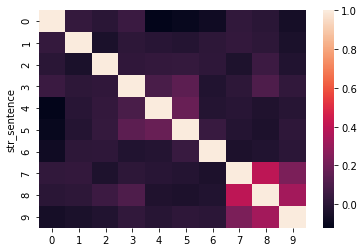

Key:
0 PARTY RESPONSIBILITIES
1 It is the firm duty of each of our free citizens and of every free citizen everywhere to place the cause of his country before the comfort, the convenience of himself.
2 Self-government relies, in the end, on the governing of the self.
3 Here before me is the Bible used in the inauguration of our first President, in 1789, and I have just taken the oath of office on the Bible my mother gave me a few years ago, opened to a timeless admonition from the ancient prophet Micah: "He hath showed thee, O man, what is good; and what doth the Lord require of thee, but to do justly, and to love mercy, and to walk humbly with thy God."
4 Much time has passed since Jefferson arrived for his inauguration.
5 On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.
6 We seek, instead, to reduce their number.
7 Yet because we have acted in the great liberating tradition of this nation, tens of millions have a

In [169]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

---

### With the whole speech

In [101]:
speeches = ['1925-Coolidge.txt','1929-Hoover.txt','1933-Roosevelt.txt','1937-Roosevelt.txt','1941-Roosevelt.txt',
            '1945-Roosevelt.txt','1949-Truman.txt',
            '1953-Eisenhower.txt','1957-Eisenhower.txt','1961-Kennedy.txt','1965-Johnson.txt','1969-Nixon.txt',
            '1973-Nixon.txt','1977-Carter.txt','1981-Reagan.txt','1985-Reagan.txt','1989-Bush.txt',
            '1993-Clinton.txt','1997-Clinton.txt','2001-Bush.txt','2005-Bush.txt','2009-Obama.txt']

#speech_df = pd.DataFrame()

#for speech in speeches:
#    speech_df['text_source'] = speech
#    speech_df['party'] = np.where(speech_df['text_source'].str.contains('Roosevelt|Truman|Kennedy|Johnson|Carter|Clinton|Obama'), 0, 1)
#    speech = inaugural.raw(speech)
#    speech_df['speech'] = speech_df['speech'].append(speech)
    
#for i in speeches:
#    for file in inaugural.raw(i):
#        speech_list = []
#        speech_list = speech_list.append(file)

#speech_df = pd.DataFrame(speech_list)
speech_df['text_source'] = speeches
speech_df['text'] = speech_df['text_source'].apply(lambda x: inaugural.raw(x))
speech_df['text'] = speech_df['text'].apply(lambda x: text_cleaner(x))
speech_df['party'] = np.where(speech_df['text_source'].str.contains('Roosevelt|Truman|Kennedy|Johnson|Carter|Clinton|Obama'), 0, 1)

speech_df.head()

,text_source,text,party
0,1925-Coolidge.txt,"My countrymen, no one can contemplate current ...",1
1,1929-Hoover.txt,My Countrymen: This occasion is not alone the ...,1
2,1933-Roosevelt.txt,I am certain that my fellow Americans expect t...,0
3,1937-Roosevelt.txt,When four years ago we met to inaugurate a Pre...,0
4,1941-Roosevelt.txt,On each national day of inauguration since 178...,0


In [150]:
X_train, X_test = train_test_split(speech_df, test_size=0.4, random_state=0)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=.75, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
speeches_tfidf=vectorizer.fit_transform(speech_df['text'])
print("Number of features: %d" % speeches_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(speeches_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]

#List of features
terms = vectorizer.get_feature_names()

#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train['text_source'])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 2122
Original sentence: 6         1949-Truman.txt
16          1989-Bush.txt
4      1941-Roosevelt.txt
2      1933-Roosevelt.txt
5      1945-Roosevelt.txt
17       1993-Clinton.txt
9        1961-Kennedy.txt
7     1953-Eisenhower.txt
18       1997-Clinton.txt
3      1937-Roosevelt.txt
0       1925-Coolidge.txt
15        1985-Reagan.txt
12         1973-Nixon.txt
Name: text_source, dtype: object
Tf_idf vector: {'faint': 0.049904922368886086, 'scripture': 0.049904922368886086, '21st': 0.049904922368886086, 'ennobled': 0.049904922368886086, 'lest': 0.049904922368886086, 'persistent': 0.049904922368886086, 'politics': 0.04151055152778084, 'deserve': 0.045177457871912796, 'sleep': 0.049904922368886086, 'fractured': 0.049904922368886086, 'remaking': 0.049904922368886086, 'technology': 0.049904922368886086, 'sights': 0.045177457871912796, 'fascism': 0.049904922368886086, 'sake': 0.14971476710665826, 'brings': 0.045177457871912796, 'winter': 0.049904922368886086, 'depth': 0.04

In [160]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)


abs_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(abs_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 100.00000000000009
Component 0:
(1985-Reagan.txt, Senator Mathias, Chief Justice Burger, Vice President Bush, Speaker O'Neill, Senator Dole, Reverend Clergy, members of my family and friends, and my fellow citizens: This day has been made brighter with the presence here of one who, for a time, has been absent Senator John Stennis. God bless you and welcome back. There is, however, one who is not with us today: Representative Gillis Long of Louisiana left us last night. I wonder if we could all join in a moment of silent prayer. (Moment of silent prayer.) Amen. There are no words adequate to express my thanks for the great honor that you have bestowed on me. I will do my utmost to be deserving of your trust. This is, as Senator Mathias told us, the 50th time that we the people have celebrated this historic occasion. When the first President, George Washington, placed his hand upon the Bible, he stood less than a single day's journey by horseb

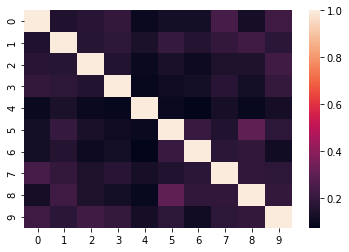

Key:
0 1949-Truman.txt
1 1989-Bush.txt
2 1941-Roosevelt.txt
3 1933-Roosevelt.txt
4 1945-Roosevelt.txt
5 1993-Clinton.txt
6 1961-Kennedy.txt
7 1953-Eisenhower.txt
8 1997-Clinton.txt
9 1937-Roosevelt.txt


In [157]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i][0])

---

In [108]:
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
    return text

#speeches = ['1941-Roosevelt.txt','1945-Roosevelt.txt','1949-Truman.txt',
#            '1953-Eisenhower.txt','1957-Eisenhower.txt','1961-Kennedy.txt','1965-Johnson.txt','1969-Nixon.txt',
#            '1973-Nixon.txt','1977-Carter.txt','1981-Reagan.txt','1985-Reagan.txt','1989-Bush.txt',
#           '1993-Clinton.txt','1997-Clinton.txt','2001-Bush.txt','2005-Bush.txt','2009-Obama.txt']

speeches = ['2001-Bush.txt','2005-Bush.txt','2009-Obama.txt']

for i in speeches:
    for file in inaugural.raw(i):
        file = text_cleaner(file)
        nlp = spacy.load('en')
        file = nlp(file)
        file_sents = [[sent, i] for sent in file.sents]
        sentences = []
        sentences = sentences.append(file_sents)

df = pd.DataFrame(sentences)
df.head()

KeyboardInterrupt: 

In [121]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [125]:
obama_sents = [[para, "Obama"] for para in inaugural.paras('2009-Obama.txt')]
wbush2_sents = [[para, "Wbush"] for para in inaugural.paras('2005-Bush.txt')]
wbush1_sents = [[para, "Wbush"] for para in inaugural.paras('2001-Bush.txt')]
clinton2_sents = [[para, "Clinton"] for para in inaugural.paras('1997-Clinton.txt')]
clinton1_sents = [[para, "Clinton"] for para in inaugural.paras('1993-Clinton.txt')]
hwbush_sents = [[para, "HWBush"] for para in inaugural.paras('1989-Bush.txt')]
reagan2_sents = [[para, "Reagan"] for para in inaugural.paras('1985-Reagan.txt')]
reagan1_sents = [[para, "Reagan"] for para in inaugural.paras('1981-Reagan.txt')]
carter_sents = [[para, "Carter"] for para in inaugural.paras('1977-Carter.txt')]
nixon2_sents = [[para, "Nixon"] for para in inaugural.paras('1973-Nixon.txt')]
nixon1_sents = [[para, "Nixon"] for para in inaugural.paras('1969-Nixon.txt')]
johnson_sents = [[para, "Johnson"] for para in inaugural.paras('1965-Johnson.txt')]
kennedy_sents = [[para, "Kennedy"] for para in inaugural.paras('1961-Kennedy.txt')]
eisenhower1_sents = [[para, "Eisenhower"] for para in inaugural.paras('1957-Eisenhower.txt')]
eisenhower2_sents = [[para, "Eisenhower"] for para in inaugural.paras('1953-Eisenhower.txt')]
truman_sents = [[para, "Truman"] for para in inaugural.paras('1949-Truman.txt')]
roosevelt4_sents = [[para, "Roosevelt"] for para in inaugural.paras('1945-Roosevelt.txt')]
roosevelt3_sents = [[para, "Roosevelt"] for para in inaugural.paras('1941-Roosevelt.txt')]
roosevelt2_sents = [[para, "Roosevelt"] for para in inaugural.paras('1937-Roosevelt.txt')]
roosevelt1_sents = [[para, "Roosevelt"] for para in inaugural.paras('1933-Roosevelt.txt')]
hoover_sents = [[para, "Hoover"] for para in inaugural.paras('1929-Hoover.txt')]
coolidge_sents = [[para, "Coolidge"] for para in inaugural.paras('1925-Coolidge.txt')]

paragraphs = pd.DataFrame(obama_sents + wbush2_sents + wbush1_sents + clinton2_sents + clinton1_sents + hwbush_sents
                        + reagan2_sents + reagan1_sents + carter_sents + nixon2_sents + nixon1_sents + johnson_sents
                        + kennedy_sents + eisenhower1_sents + eisenhower2_sents + truman_sents + roosevelt4_sents + 
                         roosevelt3_sents + roosevelt2_sents + roosevelt1_sents+hoover_sents+coolidge_sents)
paragraphs.tail()

,0,1
788,"[[We, are, not, without, our, problems, ,, but...",Coolidge
789,"[[In, a, republic, the, first, rule, for, the,...",Coolidge
790,"[[The, essence, of, a, republic, is, represent...",Coolidge
791,"[[These, are, some, of, the, principles, which...",Coolidge
792,"[[It, is, in, such, contemplations, ,, my, fel...",Coolidge


In [133]:
obama_sents = [[para] for para in inaugural.paras('2009-Obama.txt')]
wbush2_sents = [[para] for para in inaugural.paras('2005-Bush.txt')]
wbush1_sents = [[para] for para in inaugural.paras('2001-Bush.txt')]
clinton2_sents = [[para] for para in inaugural.paras('1997-Clinton.txt')]
clinton1_sents = [[para] for para in inaugural.paras('1993-Clinton.txt')]
hwbush_sents = [[para] for para in inaugural.paras('1989-Bush.txt')]
reagan2_sents = [[para] for para in inaugural.paras('1985-Reagan.txt')]
reagan1_sents = [[para] for para in inaugural.paras('1981-Reagan.txt')]
carter_sents = [[para] for para in inaugural.paras('1977-Carter.txt')]
nixon2_sents = [[para] for para in inaugural.paras('1973-Nixon.txt')]
nixon1_sents = [[para] for para in inaugural.paras('1969-Nixon.txt')]
johnson_sents = [[para] for para in inaugural.paras('1965-Johnson.txt')]
kennedy_sents = [[para] for para in inaugural.paras('1961-Kennedy.txt')]
eisenhower1_sents = [[para] for para in inaugural.paras('1957-Eisenhower.txt')]
eisenhower2_sents = [[para] for para in inaugural.paras('1953-Eisenhower.txt')]
truman_sents = [[para] for para in inaugural.paras('1949-Truman.txt')]
roosevelt4_sents = [[para] for para in inaugural.paras('1945-Roosevelt.txt')]
roosevelt3_sents = [[para] for para in inaugural.paras('1941-Roosevelt.txt')]
roosevelt2_sents = [[para] for para in inaugural.paras('1937-Roosevelt.txt')]
roosevelt1_sents = [[para] for para in inaugural.paras('1933-Roosevelt.txt')]
hoover_sents = [[para] for para in inaugural.paras('1929-Hoover.txt')]
coolidge_sents = [[para] for para in inaugural.paras('1925-Coolidge.txt')]

paragraphs = [obama_sents + wbush2_sents + wbush1_sents + clinton2_sents + clinton1_sents + hwbush_sents
              + reagan2_sents + reagan1_sents + carter_sents + nixon2_sents + nixon1_sents + johnson_sents
              + kennedy_sents + eisenhower1_sents + eisenhower2_sents + truman_sents + roosevelt4_sents + 
              roosevelt3_sents + roosevelt2_sents + roosevelt1_sents+hoover_sents+coolidge_sents]

print(paragraphs[0:4])

[[[[['My', 'fellow', 'citizens', ':']]], [[['I', 'stand', 'here', 'today', 'humbled', 'by', 'the', 'task', 'before', 'us', ',', 'grateful', 'for', 'the', 'trust', 'you', 'have', 'bestowed', ',', 'mindful', 'of', 'the', 'sacrifices', 'borne', 'by', 'our', 'ancestors', '.'], ['I', 'thank', 'President', 'Bush', 'for', 'his', 'service', 'to', 'our', 'nation', ',', 'as', 'well', 'as', 'the', 'generosity', 'and', 'cooperation', 'he', 'has', 'shown', 'throughout', 'this', 'transition', '.']]], [[['Forty', '-', 'four', 'Americans', 'have', 'now', 'taken', 'the', 'presidential', 'oath', '.'], ['The', 'words', 'have', 'been', 'spoken', 'during', 'rising', 'tides', 'of', 'prosperity', 'and', 'the', 'still', 'waters', 'of', 'peace', '.'], ['Yet', ',', 'every', 'so', 'often', 'the', 'oath', 'is', 'taken', 'amidst', 'gathering', 'clouds', 'and', 'raging', 'storms', '.'], ['At', 'these', 'moments', ',', 'America', 'has', 'carried', 'on', 'not', 'simply', 'because', 'of', 'the', 'skill', 'or', 'vision